In [1]:
import json
import sys
import pandas as pd
from matplotlib import pyplot as plt
import requests
from keys import client_id, api_key

In [2]:
## style for notebook & plots - in matplotlib bookmark ##
style = 'dark_background'
plt.style.use(style)

In [3]:
%pwd

'C:\\Users\\User\\Documents\\Flatiron\\Repository\\flatiron-phase1-yelp'

In [98]:
indian_dc = pd.read_csv('C:\\Users\\User\\Documents\\Flatiron\\Repository\\flatiron-phase1-yelp\\data\\indian_dc.csv',
                        names = ['id', 'name', 'categories', 'num_categories', 'price', 'review_count', 'rating', 'street_address', 'city', 'state'], 
                        index_col=0)
indian_dc.head(10)

,id,name,categories,num_categories,price,review_count,rating,street_address,city,state
0,n-6O6I7pmmpwkW2pCO-zDw,Indigo,['indpak'],1,2,876,4.5,243 K St NE,"Washington, DC",DC
1,jj1vSlzf-G1_vTJJ6ftsAA,Pappe,['indpak'],1,2,304,4.0,1317 14th St NW,"Washington, DC",DC
2,CwdlygqT4cWwOtQGsYdoBw,Rasika,['indpak'],1,3,3126,4.5,633 D St NW,"Washington, DC",DC
3,jxTABk0jP7Y_kN3DCNiWbQ,Bombay Street Food,['indpak'],1,2,386,4.5,1413 Park Rd NW,"Washington, DC",DC
4,0CfNGIodfKdoItAmSWgDDg,RASA,['indpak'],1,2,411,4.5,1247 First St SE,"Washington, DC",DC
5,JWDgIoAfVCr97wl7AQxVvg,Spice 6 Modern Indian,['indpak'],1,2,310,4.5,740 6th St NW,"Washington, DC",DC
6,wRHR4iAYaqnDzMA7pgK2bA,Punjab Grill,"['indpak', 'cocktailbars', 'vegetarian']",3,0,334,4.5,427 11th St NW,"Washington, DC",DC
7,TgLix14aFIt4TZWNXtILdA,Bombay Street Food #2,['indpak'],1,2,166,4.0,524 8th St SE,"Washington, DC",DC
8,KsI3nntftxHygmB3obDBDQ,Masala Story,['indpak'],1,2,214,4.5,3301 12th St NE,"Washington, DC",DC
9,A3bc3FwtS5u_ISZt6mnGhQ,Butter Chicken Company 2,['indpak'],1,0,54,4.5,500 H St NE,"Washington, DC",DC


In [99]:
indian_la = pd.read_csv('C:\\Users\\User\\Documents\\Flatiron\\Repository\\flatiron-phase1-yelp\\data\\indian_la.csv',
                        names = ['id', 'name', 'categories', 'num_categories', 'price', 'review_count', 'rating', 'street_address', 'city', 'state'], 
                        index_col=0)
indian_la.head(10)

,id,name,categories,num_categories,price,review_count,rating,street_address,city,state
0,3XTjerBg_PywBN81Ts45Bg,India's Restaurant,"['indpak', 'halal', 'seafood']",3,2,2945,4.5,4366 Fountain Ave,Los Angeles,CA
1,uteG6HIb4an-y5fFCXWo7w,Anarkali Indian Restaurant,['indpak'],1,2,2977,4.5,7013 Melrose Ave,Los Angeles,CA
2,52QPoJFEObNp6f6rv8XthQ,India's Tandoori,"['indpak', 'gluten_free', 'vegan']",3,2,1190,4.0,11819 Wilshire Blvd,Los Angeles,CA
3,B6fT0KdNWPKH9Yjaz06NiA,Biriyani Kabob House,"['pakistani', 'halal', 'indpak']",3,2,908,4.5,3525 W 3rd St,Los Angeles,CA
4,2Z7pKTwHhFwuH-aTCgd-Rg,India's Tandoori,"['indpak', 'halal', 'seafood']",3,2,1464,4.0,5468 Wilshire Blvd,Los Angeles,CA
5,tEK23PiHNXBHzu8994jurg,India's Tandoori Hollywood,"['indpak', 'halal', 'seafood']",3,2,421,4.5,7300 Sunset Blvd,Los Angeles,CA
6,EB-RtApkwptE3wRCQO8bCw,Badmaash - Downtown LA,"['indpak', 'newamerican']",2,2,1841,4.0,108 W 2nd St,Los Angeles,CA
7,4F3nRn85JxIqj0lqycrLsg,India's Grill,['indpak'],1,2,796,4.5,428 S San Vicente Blvd,Los Angeles,CA
8,j3zbQyVS9C9SwzZGzAGAgg,Cardamom Indian Cuisine,"['indpak', 'halal', 'vegetarian']",3,2,916,4.5,7233 Beverly Blvd,Los Angeles,CA
9,84PmY6fwOx9Z33aX3sb_GQ,Electric Karma,"['indpak', 'vegan', 'vegetarian']",3,2,862,4.0,8222 1/2 W 3rd St,Los Angeles,CA


In [100]:
indian_dc.describe()

,num_categories,price,review_count,rating
count,230.000000,230.000000,230.000000,230.000000
mean,2.134783,1.439130,250.200000,3.841304
std,0.811548,0.853065,346.343727,0.702328
min,1.000000,0.000000,1.000000,1.000000
25%,1.000000,1.000000,50.750000,3.500000
50%,2.000000,2.000000,156.500000,4.000000
75%,3.000000,2.000000,331.500000,4.500000
max,3.000000,4.000000,3126.000000,5.000000


In [39]:
indian_dc.groupby('rating').describe()


num_categories                                                price  \
                count      mean       std  min   25%  50%   75%  max count   
rating                                                                       
1.0               2.0  1.500000  0.707107  1.0  1.25  1.5  1.75  2.0   2.0   
1.5               1.0  2.000000       NaN  2.0  2.00  2.0  2.00  2.0   1.0   
2.0               6.0  2.166667  0.408248  2.0  2.00  2.0  2.00  3.0   6.0   
2.5               5.0  2.000000  0.707107  1.0  2.00  2.0  2.00  3.0   5.0   
3.0              21.0  2.523810  0.679636  1.0  2.00  3.0  3.00  3.0  21.0   
3.5              55.0  1.981818  0.804867  1.0  1.00  2.0  3.00  3.0  55.0   
4.0              69.0  2.130435  0.838645  1.0  1.00  2.0  3.00  3.0  69.0   
4.5              62.0  2.129032  0.839279  1.0  1.00  2.0  3.00  3.0  62.0   
5.0               9.0  2.444444  0.881917  1.0  2.00  3.0  3.00  3.0   9.0   

                  ...            review_count                                \
            mean  ...   75%  max        count        mean         std   min   
rating            ...                                                         
1.0     0.000000  ...  0.00  0.0          2.0    1.500000    0.707107   1.0   
1.5     1.000000  ...  1.00  1.0          1.0   53.000000         NaN  53.0   
2.0     0.500000  ...  0.75  2.0          6.0    7.166667    6.554896   1.0   
2.5     1.400000  ...  2.00  2.0          5.0   95.200000  166.855327   2.0   
3.0     1.333333  ...  2.00  2.0         21.0  124.142857  136.594028   2.0   
3.5     1.600000  ...  2.00  3.0         55.0  200.618182  146.659026   3.0   
4.0     1.695652  ...  2.00  3.0         69.0  344.072464  368.621650   2.0   
4.5     1.354839  ...  2.00  4.0         62.0  304.290323  482.958111   2.0   
5.0     0.333333  ...  0.00  2.0          9.0   80.333333  158.105187   1.0   

                                       
           25%    50%     75%     max  
rating                                 
1.0       1.25    1.5    1.75     2.0  
1.5      53.00   53.0   53.00    53.0  
2.0       3.25    5.0    9.00    19.0  
2.5       9.00   25.0   48.00   392.0  
3.0      11.00   61.0  192.00   423.0  
3.5      97.00  171.0  290.00   706.0  
4.0     120.00  248.0  396.00  1896.0  
4.5      51.00  135.5  374.00  3126.0  
5.0       5.00   10.0   98.00   488.0  

[9 rows x 24 columns]

In [50]:
indian_dc.groupby(['price', 'rating']).describe()

num_categories                                                 \
                      count      mean       std  min   25%  50%   75%  max   
price rating                                                                 
0     1.0               2.0  1.500000  0.707107  1.0  1.25  1.5  1.75  2.0   
      2.0               4.0  2.250000  0.500000  2.0  2.00  2.0  2.25  3.0   
      2.5               1.0  2.000000       NaN  2.0  2.00  2.0  2.00  2.0   
      3.0               4.0  3.000000  0.000000  3.0  3.00  3.0  3.00  3.0   
      3.5               5.0  2.000000  0.707107  1.0  2.00  2.0  2.00  3.0   
      4.0               5.0  2.000000  1.000000  1.0  1.00  2.0  3.00  3.0   
      4.5              18.0  1.777778  0.878204  1.0  1.00  1.5  2.75  3.0   
      5.0               7.0  2.428571  0.975900  1.0  2.00  3.0  3.00  3.0   
1     1.5               1.0  2.000000       NaN  2.0  2.00  2.0  2.00  2.0   
      2.0               1.0  2.000000       NaN  2.0  2.00  2.0  2.00  2.0   
      2.5               1.0  2.000000       NaN  2.0  2.00  2.0  2.00  2.0   
      3.0               6.0  2.333333  0.516398  2.0  2.00  2.0  2.75  3.0   
      3.5              13.0  2.076923  0.954074  1.0  1.00  2.0  3.00  3.0   
      4.0              12.0  2.000000  0.953463  1.0  1.00  2.0  3.00  3.0   
      4.5              10.0  2.500000  0.527046  2.0  2.00  2.5  3.00  3.0   
      5.0               1.0  3.000000       NaN  3.0  3.00  3.0  3.00  3.0   
2     2.0               1.0  2.000000       NaN  2.0  2.00  2.0  2.00  2.0   
      2.5               3.0  2.000000  1.000000  1.0  1.50  2.0  2.50  3.0   
      3.0              11.0  2.454545  0.820200  1.0  2.00  3.0  3.00  3.0   
      3.5              36.0  1.972222  0.774084  1.0  1.00  2.0  3.00  3.0   
      4.0              51.0  2.196078  0.800490  1.0  2.00  2.0  3.00  3.0   
      4.5              29.0  2.241379  0.872401  1.0  1.00  3.0  3.00  3.0   
      5.0               1.0  2.000000       NaN  2.0  2.00  2.0  2.00  2.0   
3     3.5               1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0   
      4.0               1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0   
      4.5               4.0  2.000000  0.816497  1.0  1.75  2.0  2.25  3.0   
4     4.5               1.0  2.000000       NaN  2.0  2.00  2.0  2.00  2.0   

             review_count                                                     \
                    count         mean          std     min      25%     50%   
price rating                                                                   
0     1.0             2.0     1.500000     0.707107     1.0     1.25     1.5   
      2.0             4.0     3.500000     2.081666     1.0     2.50     3.5   
      2.5             1.0     2.000000          NaN     2.0     2.00     2.0   
      3.0             4.0    12.750000     6.751543     4.0     9.25    14.0   
      3.5             5.0    33.200000    47.725255     3.0    12.00    16.0   
      4.0             5.0    32.800000    20.957099     7.0    19.00    34.0   
      4.5            18.0    66.000000    79.476227     2.0    19.00    36.5   
      5.0             7.0    32.857143    45.337360     1.0     4.50    10.0   
1     1.5             1.0    53.000000          NaN    53.0    53.00    53.0   
      2.0             1.0    10.000000          NaN    10.0    10.00    10.0   
      2.5             1.0    25.000000          NaN    25.0    25.00    25.0   
      3.0             6.0   138.333333   177.429047     2.0     8.50    54.0   
      3.5            13.0   179.153846   151.146643    22.0    94.00   121.0   
      4.0            12.0   244.666667   274.507272     2.0    55.75   169.5   
      4.5            10.0   383.600000   612.109504     2.0    49.00   102.0   
      5.0             1.0   488.000000          NaN   488.0   488.00   488.0   
2     2.0             1.0    19.000000          NaN    19.0    19.00    19.0   
      2.5             3.0   149.666667   210.770808     9.0    28.50    

In [69]:
indian_dc.groupby('price').get_group(3)

,id,name,categories,num_categories,price,review_count,rating,street_address,city,state
2,CwdlygqT4cWwOtQGsYdoBw,Rasika,['indpak'],1,3,3126,4.5,633 D St NW,"Washington, DC",DC
10,02i1RoOkg1Vh6x1-FF-eyg,Rasika West End,['indpak'],1,3,1369,4.0,1190 New Hampshire Ave NW,"Washington, DC",DC
13,lpPCrVVMQ6X8mvId_E_BGw,Karma Modern Indian,"['indpak', 'tapasmallplates', 'cocktailbars']",3,3,301,4.5,611 I St NW,"Washington, DC",DC
32,APColJVZ2FRLJhBWQaxE_Q,The Bombay Club,['indpak'],1,3,706,3.5,815 Connecticut Ave NW,"Washington, DC",DC
6,1JRBSzV2NEo-b72ZVm6qXg,Bistro Aracosia,"['afghani', 'wine_bars']",2,3,207,4.5,5100 MacArthur Blvd,"Washington, DC",DC
22,uPxaHQsTtZ-Km8arqPsPCA,Fancy Radish,"['newamerican', 'vegan']",2,3,285,4.5,600 H St NE,"Washington, DC",DC


In [68]:
indian_dc.groupby(['price', 'name']).first()

id  \
price name                                             
0     Aracosia - McLean       1i0gf9awbeXMkrkpjWOaJg   
      Aroma Restaurant        zwFMnt8CuevYAojSk_ZIMA   
      Asian Delight           v0lKAcQmF8goU1tHnTE_sg   
      Bansari Indian Cuisine  dobXM3ElLUjeJhdSxmXyaw   
      Biryani City            vbaUufa9iCbnITzVo2JXqw   
...                                              ...   
3     Karma Modern Indian     lpPCrVVMQ6X8mvId_E_BGw   
      Rasika                  CwdlygqT4cWwOtQGsYdoBw   
      Rasika West End         02i1RoOkg1Vh6x1-FF-eyg   
      The Bombay Club         APColJVZ2FRLJhBWQaxE_Q   
4     Elizabeth's Gone Raw    hI1w_yO-8SAAp5TNmXd_2Q   

                                                                 categories  \
price name                                                                    
0     Aracosia - McLean                 ['afghani', 'steak', 'whiskeybars']   
      Aroma Restaurant                                           ['indpak']   
      Asian Delight                                ['foodtrucks', 'indpak']   
      Bansari Indian Cuisine                 ['halal', 'indpak', 'seafood']   
      Biryani City                                               ['indpak']   
...                                                                     ...   
3     Karma Modern Indian     ['indpak', 'tapasmallplates', 'cocktailbars']   
      Rasika                                                     ['indpak']   
      Rasika West End                                            ['indpak']   
      The Bombay Club                                            ['indpak']   
4     Elizabeth's Gone Raw                            ['vegan', 'raw_food']   

                              num_categories  review_count  rating  \
price name                                                           
0     Aracosia - McLean                    3            98     5.0   
      Aroma Restaurant                     1            18     4.5   
      Asian Delight                        2             2     1.0   
      Bansari Indian Cuisine               3            91     4.5   
      Biryani City                         1           112     4.5   
...                                      ...           ...     ...   
3     Karma Modern Indian                  3           301     4.5   
      Rasika                               1          3126     4.5   
      Rasika West End                      1          1369     4.0   
      The Bombay Club                      1           706     3.5   
4     Elizabeth's Gone Raw                 2           203     4.5   

                                         street_address            city state  
price name                                                                     
0     Aracosia - McLean                 1381 Beverly Rd          McLean    VA  
      Aroma Restaurant                4044 Campbell Ave       Arlington    VA  
      Asian Delight                                 NaN  Washington, DC    DC  
      Bansari Indian Cuisine            2750 Gallows Rd          Vienna    VA  
      Biryani City              4830 Boiling Brook Pkwy  North Bethesda    MD  
...                                                 ...             ...   ...  
3     Karma Modern Indian                   611 I St NW  Washington, DC    DC  
      Rasika                                633 D St NW  Washington, DC    DC  
      Rasika West End         1190 New Hampshire Ave NW  Washington, DC    DC  
      The Bombay Club            815 Connecticut Ave NW  Washington, DC    DC  
4     Elizabeth's Gone Raw                 1341 L St NW  Washington, DC    DC  

[218 rows x 8 columns]

In [ ]:
indian_dc['name'].value_counts().

In [82]:
indian_dc['price'].value_counts()

2    132
0     46
1     45
3      6
4      1
Name: price, dtype: int64

In [85]:
indian_dc['price'].value_counts().sort_values().values

array([  1,   6,  45,  46, 132], dtype=int64)

''

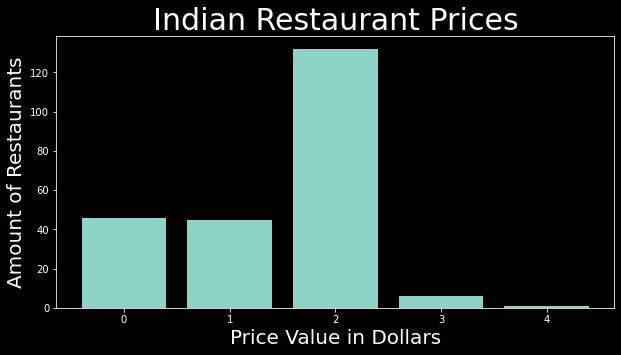

In [101]:
title = "Indian Restaurant Prices"
value = "Price Value in Dollars"
volume = "Amount of Restaurants"

x = indian_dc['price'].value_counts().sort_values().index
y = indian_dc['price'].value_counts().sort_values().values

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x,y)
ax.set_title(title, size=30)
ax.set_xlabel(value, size=20)
ax.set_ylabel(volume, size=20)
ax.set_xticks(indian_dc['price'].value_counts().sort_values().index)
;